In [1]:
%load_ext autoreload
%autoreload 2

# Backpropagating values
The main idea here is that in the vicinity of a terminated trajectory (game) we can reasonably hope to find other trajectories that would also be terminated. We hope to overcome the problem of sparse rewards during RL training.

So we look at how we can generate training data for the value function from walking backward (using ```undo()```  from a game that has finally terminated in favour of one of the parties. 

In [ ]:
import numpy as np

from wgomoku import (
    GomokuBoard, HeuristicGomokuPolicy, Heuristics, ThreatSearch,
    StochasticMaxSampler, GomokuTools as gt)

In [4]:
heuristics = Heuristics(kappa=3.0)
ts = ThreatSearch(max_depth=6, max_width=5)
p = HeuristicGomokuPolicy(bias=.5,topn=5, style=2, threat_search=ts)

In [5]:
A,B,C,D,E,F,G,H,I, J, K, L, M, N, O, P, Q, R, S, T, U = \
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
BLACK, WHITE, EDGES = 0,1,2

In [6]:
import pandas as pd
SIZE=19
df = pd.read_csv("newgames1.csv", header=None)
df.columns = ['board', 'win']
games = df['board']

In [7]:
stones = gt.string_to_stones(games[12])
board = GomokuBoard(disp_width=10, N=SIZE, heuristics= heuristics, stones = stones)

In [8]:
gt.stones_to_string(stones), board.game_state()

('j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13h14j14j15', 1)

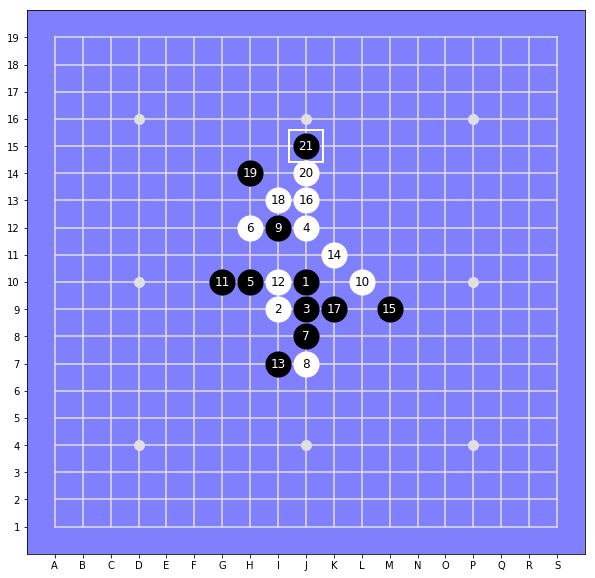

In [9]:
board.display()

In [10]:
from wgomoku import create_sample, to_matrix12

In [11]:
ts = ThreatSearch(max_depth=4, max_width=5)
p = HeuristicGomokuPolicy(bias=.5,topn=5, style=2, threat_search=ts)

In [12]:
p.suggest(board)

Win-in-2: (K, 15)

### The ```ValueTracker```

In [13]:
from wgomoku import ValueTracker

In [14]:
tracker = ValueTracker(p)

Register a board with its value. Duplicates are (silently ignored).

In [15]:
newboards = tracker.register(board)
tracker, newboards

([[1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13h14j14j15']], 1)

---
### One step back

0

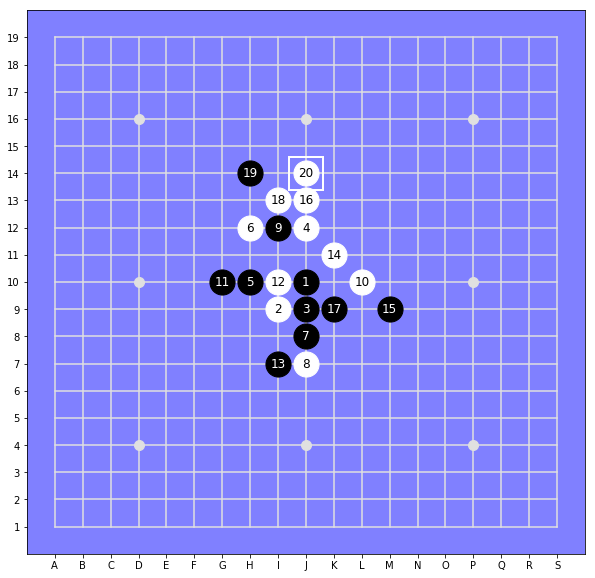

In [16]:
board.undo().display()
board.game_state()

In [17]:
enum = np.ndenumerate(p.probas(board=board, style=2))
sampler = StochasticMaxSampler(enum, topn=10)
choices = [ gt.m2b((x,y),SIZE) for _, (x,y), prob, _ in sampler.choices]
[(chr(x+64), y) for x,y in choices]

[('G', 11), ('K', 15), ('J', 15)]

If all possible moves lead to the same terminating value, then the value before the move is just that same outcome. At the same time we record also the other terminating outcomes.

In [18]:
newboards = tracker.register(board)
tracker, newboards

([[1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13h14j14j15'], [1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13h14j14g11'], [1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13h14j14k15'], [-1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13h14j14']],
 3)

---
### And one more step back

0

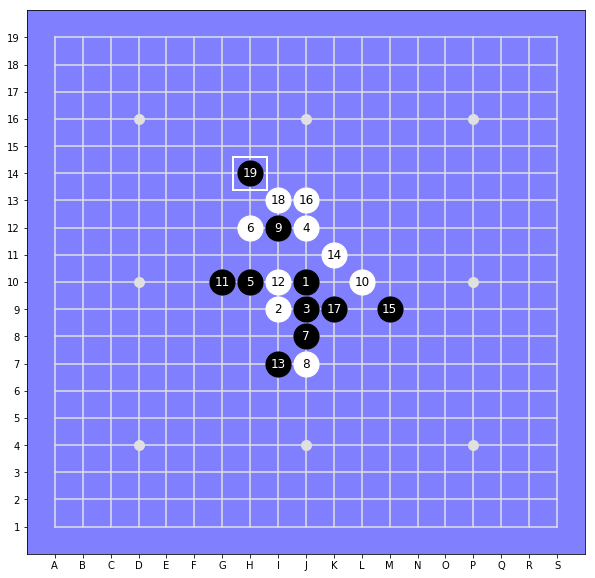

In [19]:
board.undo().display()
board.game_state()

In [20]:
enum = np.ndenumerate(p.probas(board=board, style=2))
sampler = StochasticMaxSampler(enum, topn=10)
choices = [ gt.m2b((x,y),SIZE) for _, (x,y), prob, _ in sampler.choices]
[(chr(x+64), y) for x,y in choices]

[('J', 14)]

In [21]:
newboards = tracker.register(board)
tracker, newboards

([[1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13h14j14j15'], [1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13h14j14g11'], [1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13h14j14k15'], [-1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13h14j14'], [1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13h14']],
 1)

The value of (J, 14) is zero, but we have the forward-looking value of (J, 14) already registered! So, if all possible moves lead to a board with a known value, the negative of that value is the value of the registered board.

0

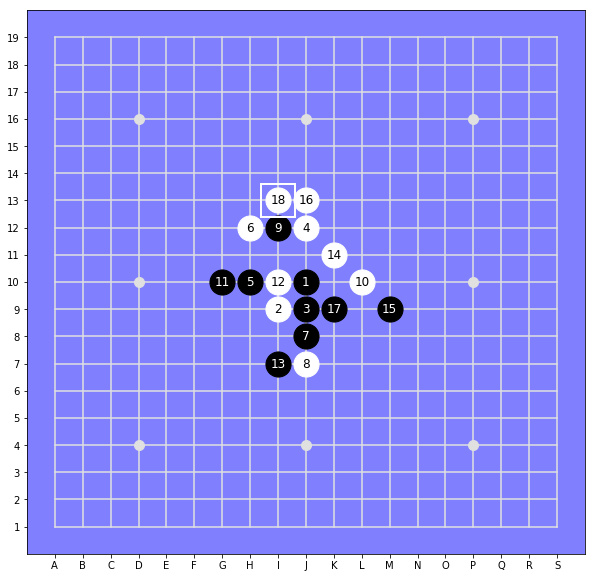

In [22]:
board.undo().display()
board.game_state()

In [23]:
enum = np.ndenumerate(p.probas(board=board, style=2))
sampler = StochasticMaxSampler(enum, topn=10)
choices = [ gt.m2b((x,y),SIZE) for _, (x,y), prob, _ in sampler.choices]
[(chr(x+64), y) for x,y in choices]

[('H', 14)]

In [24]:
newboards = tracker.register(board)
tracker, newboards

([[1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13h14j14j15'], [1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13h14j14g11'], [1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13h14j14k15'], [-1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13h14j14'], [1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13h14'], [-1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13']],
 1)

(0, (9, 13))

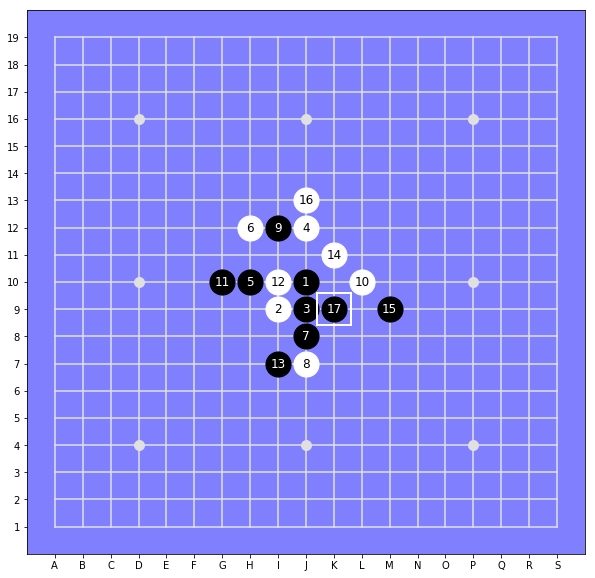

In [25]:
last_move = board.stones[-1]
board.undo().display()
board.game_state(), last_move

In [26]:
enum = np.ndenumerate(p.probas(board=board, style=2))
sampler = StochasticMaxSampler(enum, topn=10)
choices = [ gt.m2b((x,y),SIZE) for _, (x,y), prob, _ in sampler.choices]
[(chr(x+64), y) for x,y in choices]

[('L', 9),
 ('I', 13),
 ('L', 8),
 ('F', 10),
 ('J', 11),
 ('M', 7),
 ('H', 14),
 ('G', 5),
 ('H', 6),
 ('I', 11)]

In [27]:
newboards = tracker.register(board)
tracker, newboards

([[1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13h14j14j15'], [1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13h14j14g11'], [1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13h14j14k15'], [-1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13h14j14'], [1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13h14'], [-1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13']],
 0)

Now we have come to head of the threat sequence. All of the above can be achieved in a single call to ```reg_variants```

In [28]:
stones = gt.string_to_stones(games[12])
board = GomokuBoard(disp_width=10, N=SIZE, heuristics= heuristics, stones = stones)
tracker = ValueTracker(p)
tracker.reg_variants(board)
tracker

[[1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13h14j14j15'], [1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13h14j14g11'], [1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13h14j14k15'], [-1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13h14j14'], [1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13h14'], [-1, 'j10i9j9j12h10h12j8j7i12l10g10i10i7k11m9j13k9i13']]

---
### Using trees from threat search
A long threat sequence from Victoria's win over Xokk:

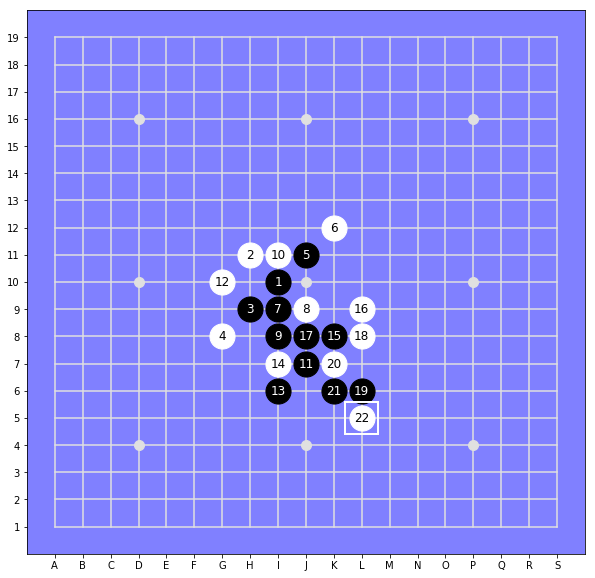

In [30]:
v_vs_x = 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k8l9j8l8l6k7k6l5'
stones = gt.string_to_stones(v_vs_x)
board = GomokuBoard(disp_width=10, N=19, heuristics= heuristics, stones = stones)

board.display()

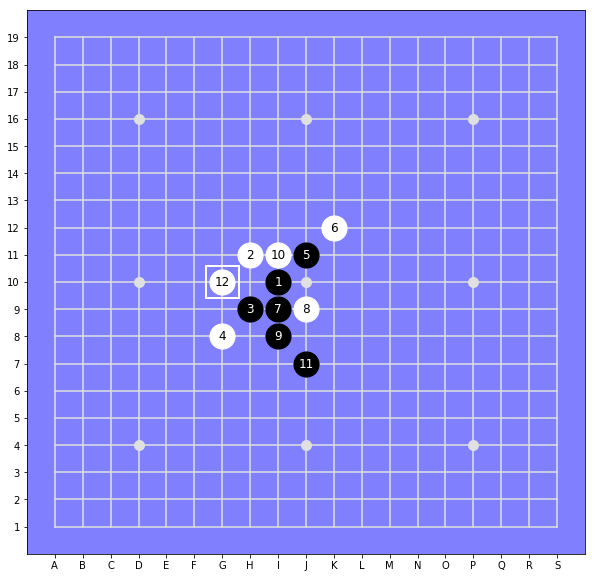

In [31]:
v_vs_x = 'i10h11h9g8j11k12i9j9i8i11j7g10' #'i6i7k8l9j8l8l6k7k6l5'
stones = gt.string_to_stones(v_vs_x)
board = GomokuBoard(disp_width=10, N=19, heuristics= heuristics, stones = stones)

board.display()

In [32]:
ts = ThreatSearch(7,4)
moves, tree = ts.is_tseq_won(board)
moves

([(9, 6),
  (9, 7),
  (11, 6),
  (12, 5),
  (11, 8),
  (8, 5),
  (13, 10),
  (12, 9),
  (11, 7),
  (11, 5),
  (12, 6),
  (10, 8),
  (10, 6)],
 True)

In [33]:
terminated = tree.select(lambda n: n.value != 0)

In [34]:
len(tree.all_trajectories())

13

Value: 1 - Game state: 1


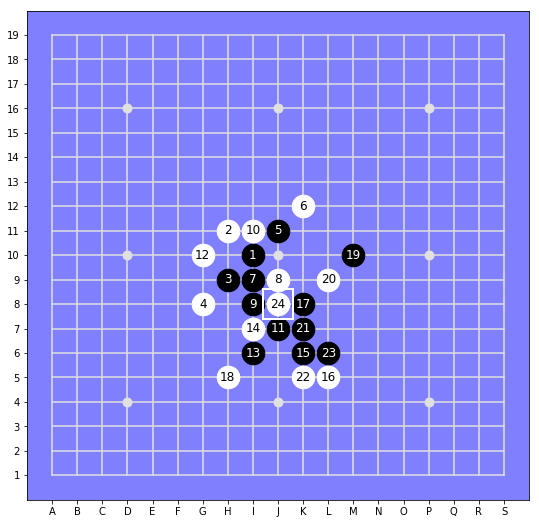

In [35]:
stones, value = tree.all_trajectories()[5]
b = GomokuBoard(disp_width=9, N=19, heuristics=heuristics, stones = stones)
print("Value: %s - Game state: %s" % (value, b.game_state()))
b.display()

In [76]:
tracker = ValueTracker(p)
for t in tree.all_trajectories():
    b = GomokuBoard(disp_width=9, N=19, heuristics=heuristics, stones = t[0])
    tracker.reg_variants(b)
tracker, len(tracker.reg)

([[1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5j6h6l6m6k8h5k7k9'], [1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5j6h6l6m6k8h5k7k5'], [1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5j6h6l6m6k8h5k7j8'], [-1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5j6h6l6m6k8h5k7'], [1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5j6h6l6m6k8l9k7j8'], [1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5j6h6l6m6k8l9k7k5'], [1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5j6h6l6m6k8l9k7k9'], [-1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5j6h6l6m6k8l9k7'], [1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5k8h5m10l9k7k5l6j8'], [1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5k8h5m10l9k7k5l6j6'], [-1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5k8h5m10l9k7k5l6'], [1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5k8h5m10l9k7k9l6j6'], [1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5k8h5m10l9k7k9l6j8'], [-1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5k8h5m10l9k7k9l6'], [1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5k8l9h5g4k7k5l6j6'], [1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5k8l9h5g4

See? From a single game state that represents the beginning of a winning threat sequence, we can find 20 samples with a well-defined non-zero state. That will certainly help training a policy function. But we can do even better. Any state within the threat sequence is just another state with well-defined value. Evaluated early states in a threat-sequence and will help train the policy to see the future! That means indeed that the policy will start at a significantly higher strength than with only the naive heuristics

In [77]:
trajectories = [(l[1], l[0]) for l in tracker.reg.values()]

In [86]:
for t in trajectories:
    stones = gt.string_to_stones(t[0])
    value = t[1]
    if value == 1:
        to_go = stones[-10:]
        stones = stones[:-10]
    elif value == -1:
        to_go = stones[-9:]
        stones = stones[:-9]
    value = 1
    board = GomokuBoard(
        disp_width=10, N=19, heuristics= heuristics, stones = stones)  
    for x,y in to_go:
        tracker.reg_variants(board, value)
        value = -value
        board.set(x,y)

In [79]:
len(tracker.reg)

44

In [80]:
tracker

[[1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5j6h6l6m6k8h5k7k9'], [1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5j6h6l6m6k8h5k7k5'], [1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5j6h6l6m6k8h5k7j8'], [-1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5j6h6l6m6k8h5k7'], [1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5j6h6l6m6k8l9k7j8'], [1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5j6h6l6m6k8l9k7k5'], [1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5j6h6l6m6k8l9k7k9'], [-1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5j6h6l6m6k8l9k7'], [1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5k8h5m10l9k7k5l6j8'], [1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5k8h5m10l9k7k5l6j6'], [-1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5k8h5m10l9k7k5l6'], [1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5k8h5m10l9k7k9l6j6'], [1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5k8h5m10l9k7k9l6j8'], [-1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5k8h5m10l9k7k9l6'], [1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5k8l9h5g4k7k5l6j6'], [1, 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5k8l9h5g4k

### Quality check
First, let's look at an example. Below, we're looking at a trajectory that's among the above registered trajectories with a value of -1. That means that black has just made another move and the value (-1 from white's point of view) suggests that this is just another threat in a winning threat sequence.

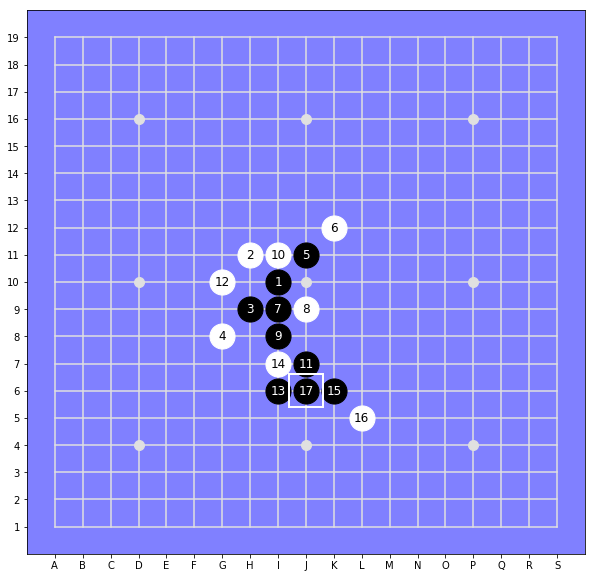

In [103]:
sample = 'i10h11h9g8j11k12i9j9i8i11j7g10i6i7k6l5j6'
stones = gt.string_to_stones(sample)
board = GomokuBoard(disp_width=10, N=19, heuristics= heuristics, stones = stones)
board.display()

What we do now is: defend the current threat and then see whether the resulting position is in fact representing the start of a winning threat sequence for black. 

In [109]:
ts = ThreatSearch(max_depth=6, max_width=3)
board = GomokuBoard(
    disp_width=10, N=19, heuristics= heuristics, stones = stones)  
move = p.suggest(bias=10.0, topn=5, board=board, style=2)
board.set(move.x, move.y)
ts.is_tseq_won(board)    

(([(12, 6),
   (13, 6),
   (10, 4),
   (10, 5),
   (11, 5),
   (13, 7),
   (11, 7),
   (10, 8),
   (11, 4)],
  True),
 (8, 6))

You can see this is true for our example. Now let's do exactly that for all of the 44 different trajectories that we have found to have terminal or pre-terminal state, the latter justified by well-determined threat-sequences

In [110]:
trajectories = [(l[1], l[0]) for l in tracker.reg.values()]
len(trajectories)

44

In [111]:
ts = ThreatSearch(max_depth=6, max_width=3)
faults=[]
for t in trajectories:
    stones = gt.string_to_stones(t[0])
    value = t[1]
    board = GomokuBoard(
        disp_width=10, N=19, heuristics= heuristics, stones = stones)  
    state = board.game_state()
    if state != 0 and state != value:
        print("Discrepenccy: ", t[0], state, value)
        faults.append(t)
    elif value == 1:
        (_, won), _ = ts.is_tseq_won(board)
        if not won:
            print("Not a threat:", t[0], value)
            faults.append(t)
    elif value == -1:
        move = p.suggest(bias=10.0, topn=5, board=board, style=2)
        board.set(move.x, move.y)
        (_, won), _ = ts.is_tseq_won(board)
        if not won:
            print("Not a threat:", t[0], value)
            faults.append(t)

In [112]:
faults

[]